In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Assignment 4/Mall_Customers.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [12]:
data.shape

(200, 5)

# Visualizations


# Univariate Analysis

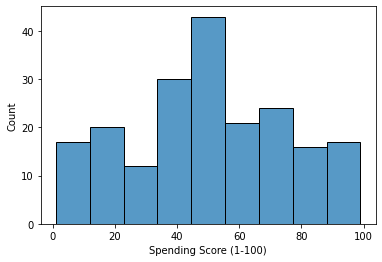

In [13]:
sns.histplot(data['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


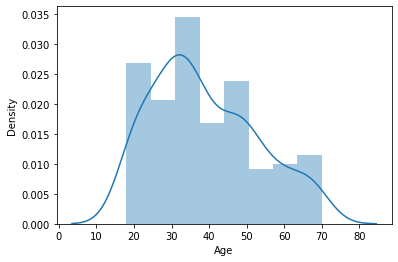

In [14]:
sns.distplot(data['Age'])

# Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


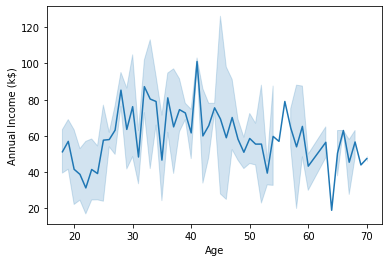

In [15]:
sns.lineplot(data['Age'],data['Annual Income (k$)'])

# Multivariate analysis

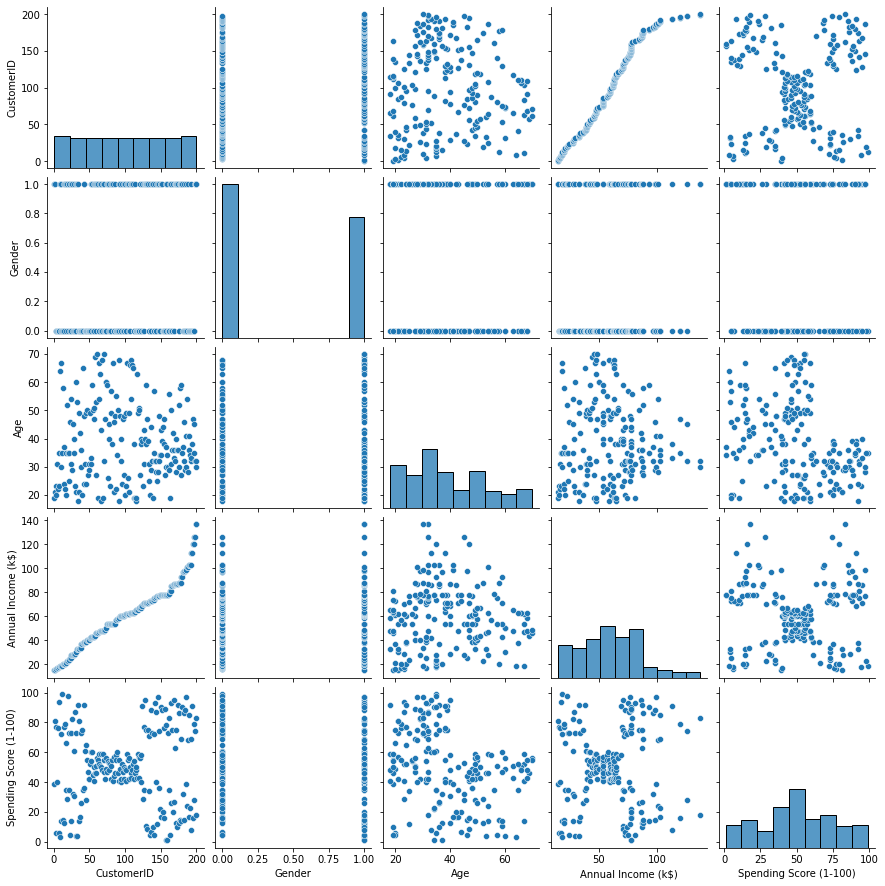

In [16]:
sns.pairplot(data)

# Descriptive Statistics

In [17]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


# Check for missing values

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values were found

# Finding outliers 

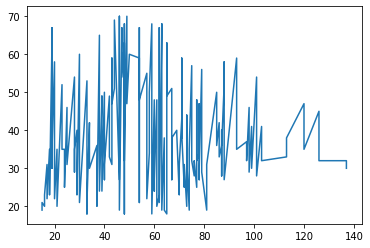

In [18]:
x = data['Annual Income (k$)']
y = data['Age']

plt.plot(x, y)


# Check for categorical columns and perfom encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
dfscaled=pd.DataFrame(scale.fit_transform(data),columns=data.columns)
dfscaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


# K means

In [20]:
from sklearn import cluster

In [21]:
error=[]
for i in range(1,15):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dfscaled)
    error.append(kmeans.inertia_)


In [22]:
error

[103.5156530146308,
 54.050978786613456,
 43.45479481651537,
 34.90188051873929,
 29.540025557086715,
 24.969480781934635,
 20.39124415926319,
 16.929788762861115,
 14.872041868621128,
 12.736718840679206,
 11.324533739393036,
 10.146868056500933,
 9.419597616209096,
 8.863848746603546]

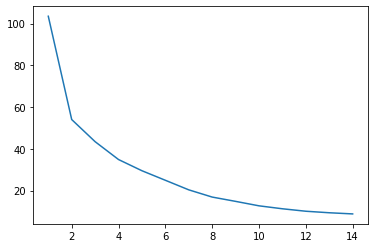

In [23]:
plt.plot(range(1,15),error)


In [24]:
kmmodel=cluster.KMeans(n_clusters=7,init='k-means++',random_state=0)
kmmodel.fit(dfscaled)


KMeans(n_clusters=7, random_state=0)

In [25]:
TargetCustomers=kmmodel.predict(dfscaled)
TargetCustomers

array([5, 5, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 2, 4, 5, 5, 4, 5, 1, 4, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 4, 1, 4, 1, 5, 2, 4, 2, 4, 2, 4, 2, 5, 1, 4,
       2, 4, 2, 4, 4, 4, 2, 5, 4, 1, 2, 1, 2, 1, 4, 1, 1, 5, 2, 2, 1, 5,
       2, 2, 5, 4, 1, 2, 2, 2, 1, 5, 2, 5, 4, 2, 1, 5, 1, 2, 4, 1, 2, 4,
       4, 2, 2, 5, 1, 2, 4, 5, 2, 4, 1, 5, 4, 2, 1, 5, 1, 4, 2, 1, 1, 1,
       1, 4, 2, 5, 4, 4, 2, 2, 2, 2, 3, 0, 0, 3, 0, 0, 6, 3, 6, 3, 6, 3,
       0, 0, 6, 0, 2, 3, 6, 0, 2, 3, 0, 0, 6, 3, 6, 0, 0, 3, 6, 3, 0, 0,
       0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 3, 6, 3, 6, 3, 0, 0,
       6, 3, 6, 3, 0, 0, 6, 0, 0, 3, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3,
       6, 3], dtype=int32)

# Adding the clustered to the primary dataset

In [26]:
data.insert(loc=4,column='TargetCustomers',value=TargetCustomers)

In [27]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),TargetCustomers,Spending Score (1-100)
0,1,1,19,15,5,39
1,2,1,21,15,5,81
2,3,0,20,16,4,6
3,4,0,23,16,4,77
4,5,0,31,17,4,40


# Split the data into dependent and independent variables

In [28]:
x=dfscaled.iloc[:,:-1]
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,0.000000,1.0,0.019231,0.000000
1,0.005025,1.0,0.057692,0.000000
2,0.010050,0.0,0.038462,0.008197
3,0.015075,0.0,0.096154,0.008197
4,0.020101,0.0,0.250000,0.016393


In [49]:
Y= dfscaled.iloc[:,-1]
Y

0      0.387755
1      0.816327
2      0.051020
3      0.775510
4      0.397959
         ...   
195    0.795918
196    0.275510
197    0.744898
198    0.173469
199    0.836735
Name: Spending Score (1-100), Length: 200, dtype: float64

# Split the data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Build the Model

In [46]:
from sklearn.svm import SVC
model=SVC()

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# Training the Model

In [39]:
model.fit(x_train,y_train)


LogisticRegression()

In [40]:
train_pred=model.predict(x_train)
train_pred


array([32, 35, 35, 19, 32, 49, 67, 19, 32, 32, 49, 32, 32, 32, 32, 49, 67,
       32, 49, 49, 32, 49, 32, 35, 32, 32, 49, 32, 19, 49, 32, 49, 32, 49,
       32, 49, 67, 19, 19, 32, 32, 49, 32, 32, 67, 49, 35, 67, 32, 32, 35,
       67, 32, 49, 32, 32, 32, 32, 32, 32, 32, 32, 49, 19, 32, 67, 19, 67,
       32, 19, 35, 35, 35, 32, 35, 32, 19, 32, 32, 19, 19, 23, 32, 35, 32,
       49, 35, 49, 32, 32, 35, 19, 32, 32, 32, 32, 32, 19, 32, 35, 32, 67,
       35, 67, 19, 19, 32, 32, 67, 32, 32, 32, 19, 35, 32, 67, 32, 32, 35,
       35, 32, 32, 35, 32, 32, 32, 67, 32, 32, 32, 35, 19, 67, 49, 32, 32,
       32, 49, 19, 19, 32, 19, 32, 32, 32, 23, 35, 32, 32, 67, 32, 35, 19,
       35, 19, 49, 32, 32, 35, 32])

# Testing the model

In [41]:
test_pred=model.predict(x_test)
test_pred


array([67, 32, 32, 32, 32, 32, 35, 32, 49, 32, 19, 32, 32, 32, 67, 35, 19,
       32, 35, 67, 32, 32, 35, 32, 67, 32, 32, 32, 32, 49, 35, 67, 32, 32,
       35, 32, 32, 35, 49, 49])

# Measuring Performance

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('test accuracy score: ',accuracy_score(y_test,test_pred))
print('train accuracy score: ',accuracy_score(y_train,train_pred))


test accuracy score:  0.075
train accuracy score:  0.14375


In [43]:
pd.crosstab(y_test,test_pred)


col_0,19,32,35,49,67
Age,,,,,
18,1,0,0,0,0
19,1,1,0,0,0
22,0,0,1,0,0
23,0,0,1,0,0
24,0,0,1,0,0
27,0,1,0,0,0
28,0,1,0,0,0
29,0,1,0,0,0
30,0,2,1,0,0


In [44]:
pd.crosstab(y_train,train_pred)

col_0,19,23,32,35,49,67
Age,,,,,,
18,2,0,1,0,0,0
19,3,0,3,0,0,0
20,2,1,1,1,0,0
21,1,0,2,2,0,0
22,1,0,1,0,0,0
23,0,1,2,2,0,0
24,2,0,0,1,0,0
25,1,0,2,0,0,0
26,2,0,0,0,0,0
